## Method 1



In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# constants
rho_oil = 875.3
rho_air = 1.204
g = 9.80
nu = 1.827e-5
d = 6.0e-3
precision = 19

# file paths
velocities_file = '/Users/lucaschoi/Documents/GitHub/PHY294-Milikan-Oil-Drop-Experiment/velocities.tsv'
method1_results_file = '/Users/lucaschoi/Documents/GitHub/PHY294-Milikan-Oil-Drop-Experiment/method1.py'

# charges, uncertainties
charges = []
charge_uncs = []
V_unc = 0.3

# read velocities from file
velocities_df = pd.read_csv(velocities_file, sep='\t')

In [ ]:
for _, row in velocities_df.iterrows():
    try:
        # Calculate the charge
        V_stop = row['stopping_voltage'] + 35
        v_d = row['v_fall']
        v_d_unc = row['v_fall_unc']
        q = (9 * np.pi * d / V_stop) * np.sqrt((2 * nu**3 * v_d**3) / (g * rho_oil))

        # Calculate the uncertainty in charge
        partial_q_vd = (3 / 2) * (v_d ** (1/2)) / V_stop
        partial_q_V_stop = -(v_d ** (3/2)) / (V_stop ** 2)
        q_unc = np.sqrt((partial_q_vd * v_d_unc) ** 2 + (partial_q_V_stop * V_unc) ** 2)
        charges.append(q)
        charge_uncs.append(q_unc)
        # print(f'q = {q:.10} \pm {q_unc:.10} C')

    except Exception as e:
        print(f"{e}")
all_e = []


In [ ]:

def estimate_elementary_charge(q_list, e_min=1e-19, e_max=2e-19, num_steps=1000000):
    """
    Estimate the elementary charge by trying possible divisors of q_list.
    
    Args:
        q_list (array-like): Measured charges in Coulombs
        e_min, e_max: Range to scan for candidate e
        num_steps: Number of candidate e values to test
    
    Returns:
        best_e: Estimated elementary charge
        scores: List of scores for all candidate e values
    """

    q_array = np.array(q_list)

    # list of possible e values to check
    candidate_es = np.linspace(e_min, e_max, num_steps)
    best_score = float('inf')
    best_e = None
    scores = []

    for e in candidate_es:

        # Divide all q values by e and check how close to nearest integer
        multiples = q_array / e
        residuals = np.abs(multiples - np.round(multiples))

        # Weighted residuals since we have uncertainties
        weighted_residuals = residuals / charge_uncs
        score = np.max(np.abs(weighted_residuals))
        # score = np.mean(residuals)

        scores.append(score)
        all_e.append((e, score))
        
        if score < best_score:
            best_score = score
            best_e = e

    return best_e, scores, candidate_es

In [44]:
print(min(charges), max(charges))

8.708768049810126e-20 1.8704579055058954e-18


In [45]:
e_max = 1e-18
e_min = 1e-21
estimated_e = []
probe_min = e_min
all_e = []

# Step size for incrementing and decrementing
step_size = 5e-20

while probe_min <= e_max:
    probe_max = probe_min + step_size
    print(f"Testing range: e_min = {probe_min:.3e}, e_max = {probe_max:.3e}")
    
    best_e, scores, candidate_es = estimate_elementary_charge(
        charges,
        e_min=probe_min,
        e_max=probe_max,
        num_steps=10000
    )
    
    estimated_e.append((probe_min, probe_max, best_e, scores))
    
    probe_min = probe_max


Testing range: e_min = 1.000e-21, e_max = 5.100e-20
Testing range: e_min = 5.100e-20, e_max = 1.010e-19
Testing range: e_min = 1.010e-19, e_max = 1.510e-19
Testing range: e_min = 1.510e-19, e_max = 2.010e-19
Testing range: e_min = 2.010e-19, e_max = 2.510e-19
Testing range: e_min = 2.510e-19, e_max = 3.010e-19
Testing range: e_min = 3.010e-19, e_max = 3.510e-19
Testing range: e_min = 3.510e-19, e_max = 4.010e-19
Testing range: e_min = 4.010e-19, e_max = 4.510e-19
Testing range: e_min = 4.510e-19, e_max = 5.010e-19
Testing range: e_min = 5.010e-19, e_max = 5.510e-19
Testing range: e_min = 5.510e-19, e_max = 6.010e-19
Testing range: e_min = 6.010e-19, e_max = 6.510e-19
Testing range: e_min = 6.510e-19, e_max = 7.010e-19
Testing range: e_min = 7.010e-19, e_max = 7.510e-19
Testing range: e_min = 7.510e-19, e_max = 8.010e-19
Testing range: e_min = 8.010e-19, e_max = 8.510e-19
Testing range: e_min = 8.510e-19, e_max = 9.010e-19
Testing range: e_min = 9.010e-19, e_max = 9.510e-19
Testing rang

In [46]:
# sort the all_e's by the best score
all_e.sort(key=lambda x: x[1])

for i in range(100):
    print(f"Best e = {all_e[i][0]:.6e} C with score {all_e[i][1]}")

# average of best 10 ** n
for i in range(6):

    scale = 10 ** i
    if scale > len(all_e):
        break
    print(f"Average of best {scale} = {np.mean([all_e[i][0] for i in range(scale)]):.3e} C")

print(max(all_e[:100], key=lambda x: x[0]))




Best e = 5.710471e-21 C with score 39040008586.83734
Best e = 1.001000e-18 C with score 39453490241.96637
Best e = 1.000995e-18 C with score 39453687333.04078
Best e = 1.000990e-18 C with score 39453884426.084335
Best e = 1.000985e-18 C with score 39454081521.09709
Best e = 1.000980e-18 C with score 39454278618.07906
Best e = 1.000975e-18 C with score 39454475717.03029
Best e = 1.000970e-18 C with score 39454672817.950775
Best e = 1.000965e-18 C with score 39454869920.840576
Best e = 1.000960e-18 C with score 39455067025.699715
Best e = 1.000955e-18 C with score 39455264132.52822
Best e = 1.000950e-18 C with score 39455461241.32611
Best e = 1.000945e-18 C with score 39455658352.09343
Best e = 1.000940e-18 C with score 39455855464.83021
Best e = 1.000935e-18 C with score 39456052579.53646
Best e = 1.000930e-18 C with score 39456249696.21223
Best e = 1.000925e-18 C with score 39456446814.85754
Best e = 1.000920e-18 C with score 39456643935.47242
Best e = 1.000915e-18 C with score 3945684

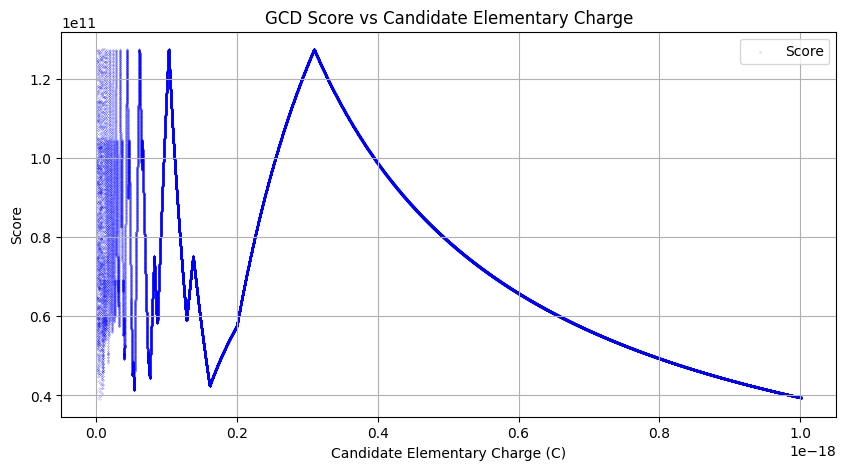

In [47]:
# Unpack all_e
# all_e = sorted(all_e, key=lambda x: x[1])
candidate_es, scores = zip(*all_e)



# Plot
plt.figure(figsize=(10, 5))
plt.scatter(candidate_es, scores, label='Score', color='blue', s=0.01)
plt.xlabel("Candidate Elementary Charge (C)")
plt.ylabel("Score")
plt.title("GCD Score vs Candidate Elementary Charge")
plt.grid(True)
plt.legend()

plt.show()


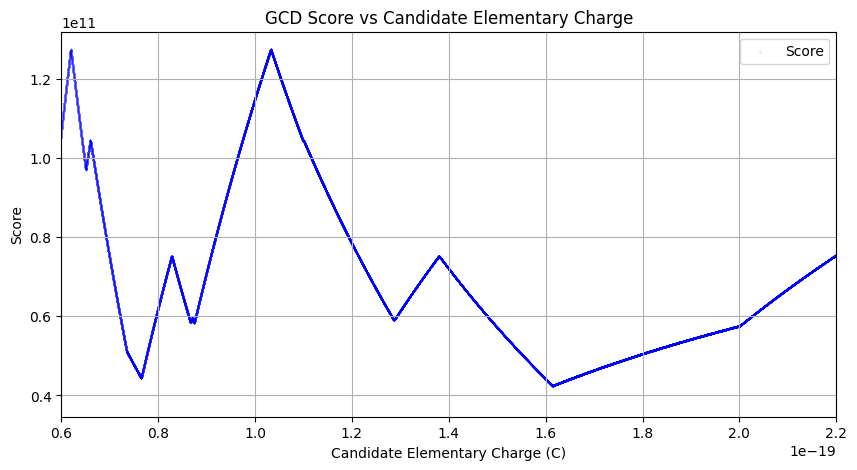

In [48]:


# Plot
plt.figure(figsize=(10, 5))
plt.scatter(candidate_es, scores, label='Score', color='blue', s=0.01)
plt.xlabel("Candidate Elementary Charge (C)")
plt.ylabel("Score")
plt.xlim(.6e-19, 2.2e-19)
plt.title("GCD Score vs Candidate Elementary Charge")
plt.grid(True)
plt.legend()

plt.show()

In [49]:
# print top 2 lowest scores between .5e-19 and 2.2e-19
top_scores = sorted(all_e, key=lambda x: x[1])
top_scores = [x for x in top_scores if .6e-19 < x[0] < 2.2e-19]
for e, score in top_scores[:5]:
    print(e, score)

1.6141604160416043e-19 42472329909.82787
1.6142104210421044e-19 42474514377.25037
1.6142604260426044e-19 42476938768.41841
1.6141104110411043e-19 42478311272.73759
1.6143104310431043e-19 42479363009.390205


In [50]:
N = 30  # You can change this to 10, 50, etc.

# Zip scores and candidate_es, then sort by score (ascending)
sorted_e = sorted(zip(scores, candidate_es))[:N]  # Take top N by score

# Extract the e values only
top_es = [e for _, e in sorted_e]

# Compute mean and standard deviation
mean_e = np.mean(top_es)
std_e = np.std(top_es)


mean_q_unc = np.mean(charge_uncs)  # in C
mean_n = np.mean([q / mean_e for q in charges])  # approx electron count per drop

propagated_e_unc = mean_q_unc / mean_n  # rough propagation

combined_unc = np.sqrt(std_e**2 + propagated_e_unc**2)

print(f"Final e = {mean_e:.3e} ± {combined_unc:.1e} C")
print(4/3 * 4.5 **(3/2))


Final e = 9.345e-19 ± 7.3e-11 C
12.727922061357855


In [51]:
for i in range(51):
    print(charges[i], charge_uncs[i])

1.2699837852130204e-19 3.573913768266252e-11
1.9540009044501294e-19 1.0812845648262779e-11
1.735034788423441e-19 3.575096292645108e-11
2.0937507892715873e-19 3.52893657170993e-11
1.8061754254631597e-19 6.429826351372578e-11
1.5485899794220705e-19 3.921181439202576e-12
4.652566576131881e-19 1.464111150973618e-11
1.8073240161991075e-19 2.1088708110265663e-11
1.6689008862092483e-19 3.505670256220758e-11
1.7277733646881906e-19 7.214137214011412e-12
1.4831050415994398e-19 8.337783050862685e-12
1.6739363093798036e-19 2.3671961469220456e-11
1.3170694548613867e-19 1.0303728031197872e-11
2.0759100060867648e-19 3.121782788277067e-11
1.3849432002057519e-19 2.0154665824292516e-11
2.1258050887108836e-19 5.187694128357793e-11
3.7555047376110636e-19 1.5843324190317844e-11
1.594471355988662e-19 1.70891296287458e-11
1.0897807979047455e-18 6.533357823558556e-11
1.389526680316659e-19 1.3094269757934376e-11
1.2868593905326528e-19 2.3805496183700478e-11
2.0693873097011734e-19 6.640107836672635e-12
8.708768